In [ ]:
!pip uninstall -y tensorflow keras keras-ocr


In [1]:
!pip install tensorflow==2.12 keras==2.12 keras-ocr


In [2]:
import tensorflow as tf
import keras
import keras_ocr
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")


TensorFlow version: 2.12.0
Keras version: 2.12.0


In [3]:
import keras_ocr

# Initialize the pipeline
pipeline = keras_ocr.pipeline.Pipeline()
print("Pipeline initialized successfully!")


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
Pipeline initialized successfully!


In [4]:
from google.colab import drive, files

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
uploaded = files.upload()

Saving billboard.png to billboard.png
Saving phone.jpg to phone.jpg


In [6]:
images = [keras_ocr.tools.read(img) for img in ['/content/billboard.png', '/content/phone.jpg']]

len(images)

2

#### Now let's use Keras OCR to predict text in images

In [7]:
prediction_groups = pipeline.recognize(images)
prediction_groups

2/2 [==============================] - 15s 4s/step


[[('see',
   array([[263.64706 ,  86.411766],
          [323.41177 , 101.352936],
          [311.52945 , 148.88235 ],
          [251.76474 , 133.9412  ]], dtype=float32)),
  ('the',
   array([[320.7205  , 103.09608 ],
          [376.85587 , 110.580795],
          [370.42795 , 158.7904  ],
          [314.29257 , 151.30568 ]], dtype=float32)),
  ('change',
   array([[378.19516, 115.68683],
          [478.95157, 139.86838],
          [468.19516, 184.68683],
          [367.43875, 160.50528]], dtype=float32)),
  ('harris',
   array([[133.94864, 122.06705],
          [179.9401 , 130.91156],
          [177.10843, 145.63623],
          [131.11697, 136.79172]], dtype=float32)),
  ('county',
   array([[180.19595, 131.09659],
          [233.41998, 144.07806],
          [229.80405, 158.90344],
          [176.58002, 145.92197]], dtype=float32)),
  ('department',
   array([[132.05884, 135.2353 ],
          [216.23529, 153.94118],
          [212.7294 , 169.71764],
          [128.55295, 151.01176]], d

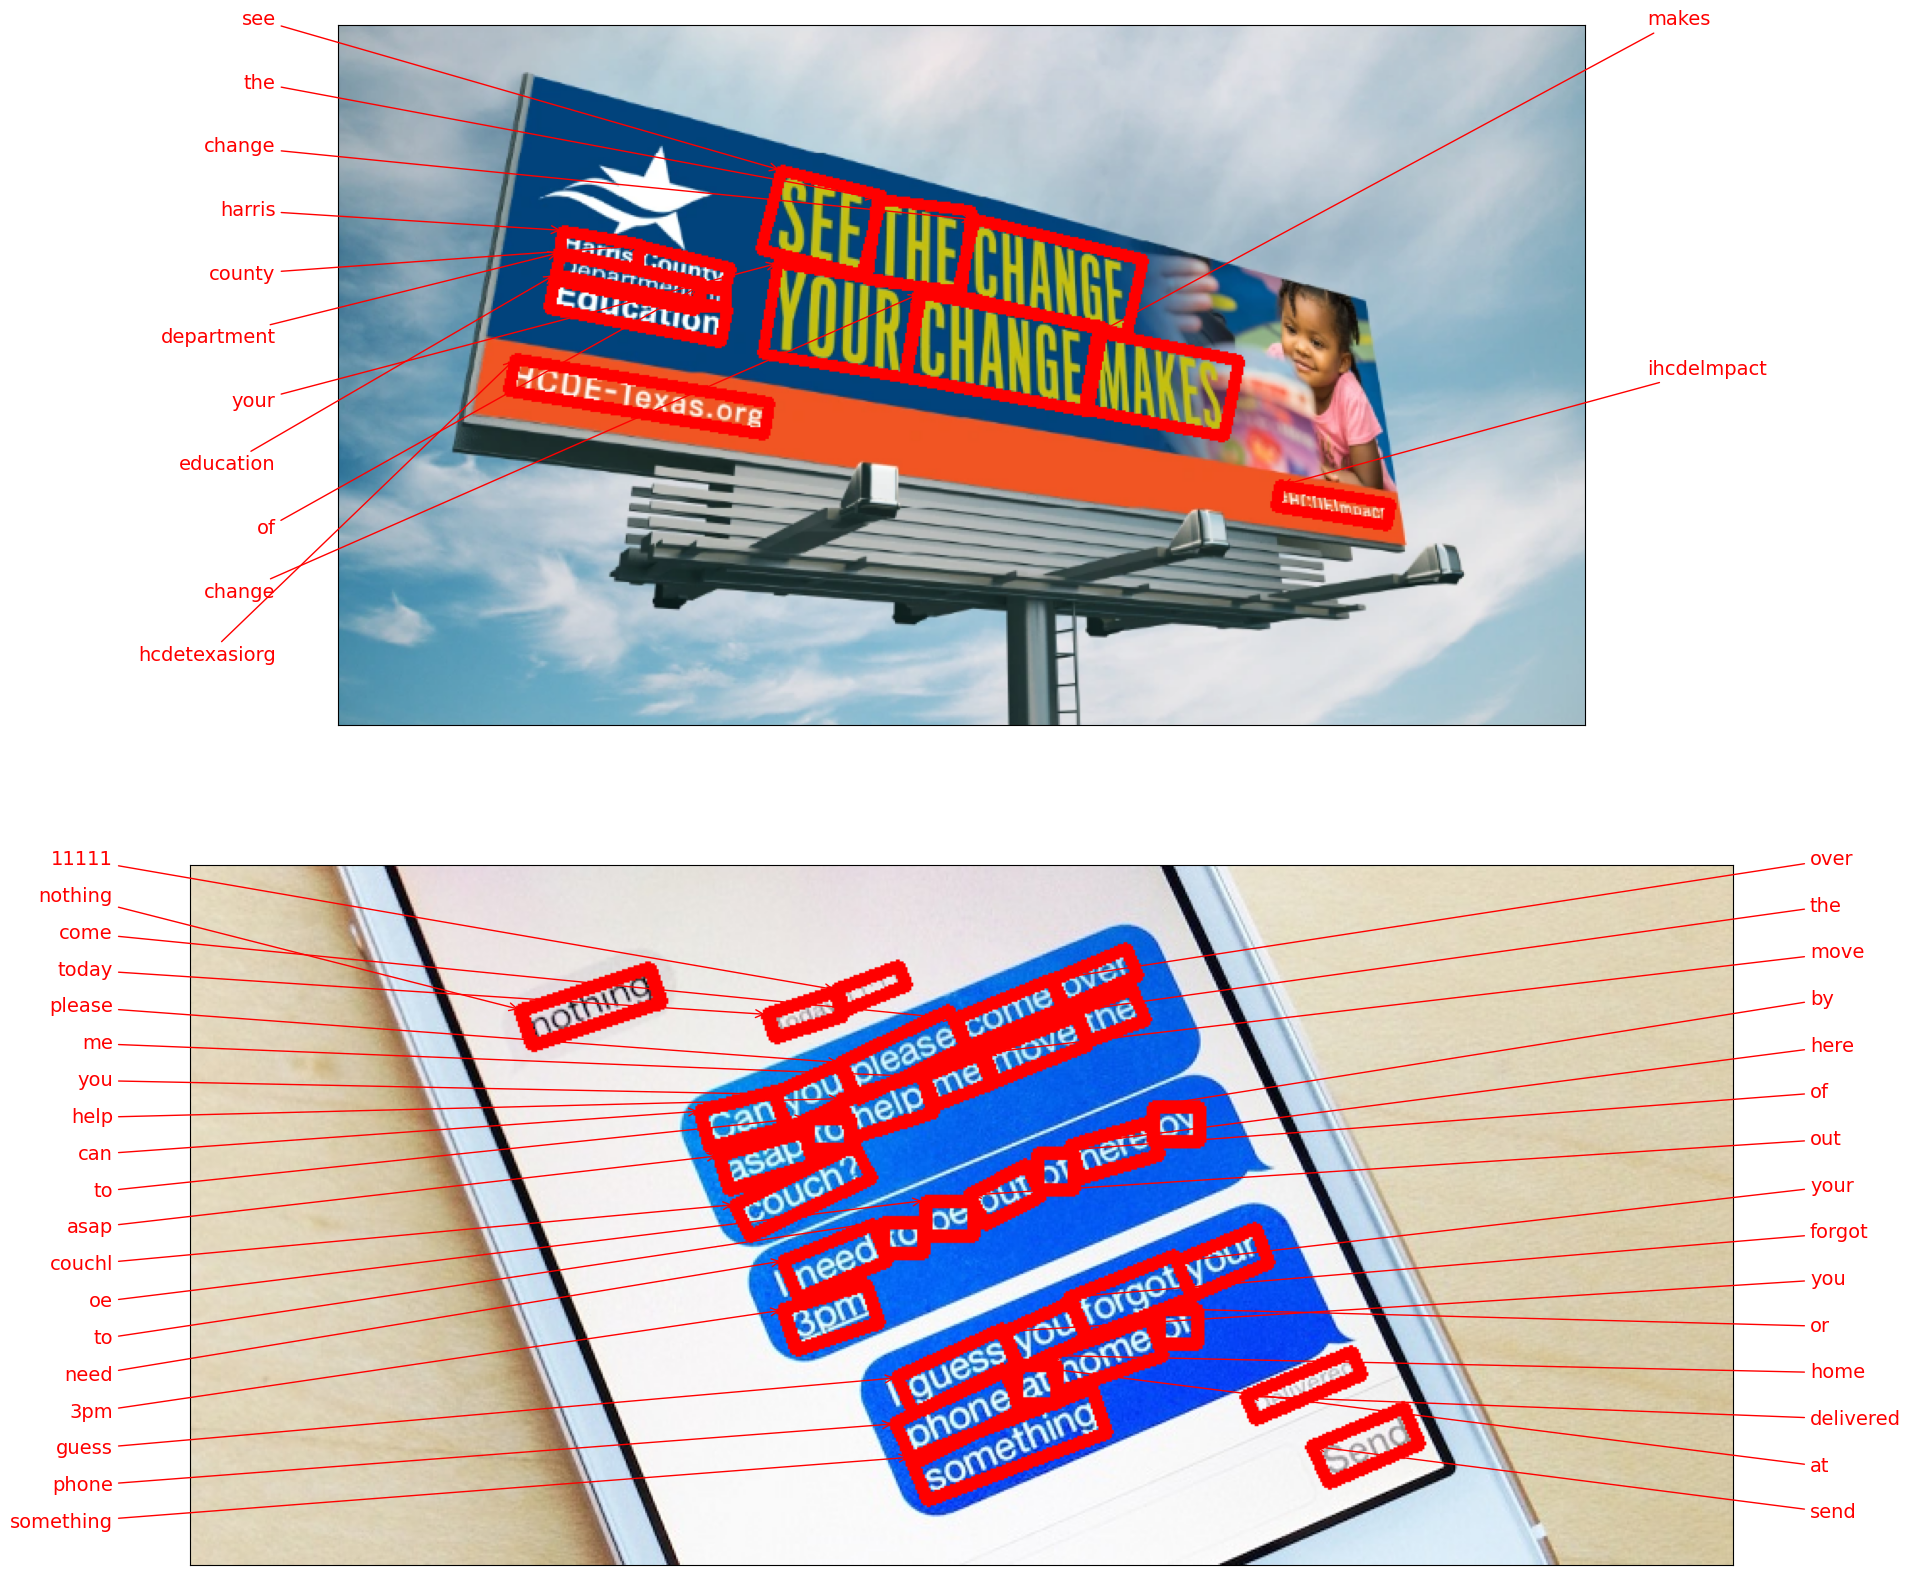

In [8]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)